This notebook follows on from the second notebook in this series *02 Introduction to matrices*. Here we will be looking at the *determinant* of matrices, which is a way to tell us how much a linear transformation from a given matrix changes (e.g., rotates or scales) regions of the input space

### Load libraries and setup plotting function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_setup(ax,xlim=[-2,4],ylim=[-2,4],xcoords=[1,0.4],ycoords=[0.4,0.95],grid=True): 
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    if grid:
        ax.grid(grid,alpha=.3)        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(np.arange(xlim[0],xlim[1]+1, 1))
    ax.set_yticks(np.arange(ylim[0], ylim[1]+1, 1))
    ax.set_xlabel('$x_1$',fontsize=12)
    ax.set_ylabel('$x_2$',rotation=0,labelpad=15,fontsize=12)
    ax.xaxis.set_label_coords(xcoords[0],xcoords[1])
    ax.yaxis.set_label_coords(ycoords[0],ycoords[1])
    return ax

### Let's think about area

Recall the unit vectors $\pmb{i} = [0,1]$ and $\pmb{j} = [1,0]$. We can think about the geometric space covered by these two vectors, which is a square of area 1 (shown by the blue area in the left plot below). When we apply a linear transformation, the space of vectors can get stretched or scaled, which may result in the transformed basis vectors $\tilde{\pmb{i}}$ and $\tilde{\pmb{j}}$ covering a different area to the input vectors. 

Taking the shear transformation as a example (middle plot below), we can see how the area now covered by $\tilde{\pmb{i}}$ and $\tilde{\pmb{j}}$ is a parallelogram, however the area still remains 1. Meanwhile, if we were to apply a transformation defined by e.g., $\tilde{\pmb{i}} = [1,-2]$ and $\tilde{\pmb{j}} = [3,0]$ (right plot below), then we can see that the area is now 6. Therefore the linear transformation has scaled the area of the 2D space by a factor of 6.

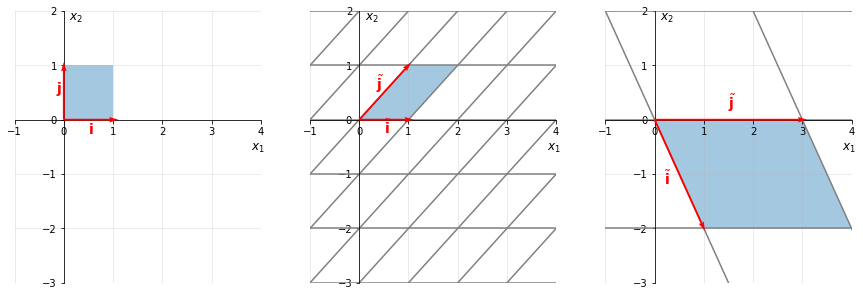

In [67]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([1,1])
j_T = np.array([1,0])
i_T2 = np.array([1,-2])
j_T2 = np.array([3,0])

fig,ax = plt.subplots(1,3,figsize=(15,5))
for c in range(3):
    ax[c] = plot_setup(ax[c],[-1,4],[-3,2],ycoords=[0.25,0.95],xcoords=[0.99,0.52])
    ax[c].scatter([0,1],[0,1],color='w')

    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].text(-0.15,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.5,-0.25,'$\mathbf{i}$',color='r',fontsize=14)
        ax[c].fill_between([0,1],[1,1],alpha=0.4)
    elif c == 1:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].text(0.35,0.55,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(0.5,-0.25,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        vertices = np.flip(np.dot(np.array([[0, 1], [1,1], [1, 0],[0,0]]),np.array([[1, 1], [0, 1]])))
        ax[c].fill(vertices[:,0],vertices[:,1], alpha=0.4)    
        
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T)
        tranJ = transform_gridlines(j_T)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T[0]*n,tranI[1]+j_T[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T[0]*n,tranJ[1]+i_T[1]*n,color=color)
            
    elif c == 2:
        ax[c].quiver(0,0,i_T2[0],i_T2[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T2[0],j_T2[1],units='xy',angles='xy',scale=1.02,color='r',zorder=1000)
        ax[c].text(1.5,0.2,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(0.2,-1.2,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        vertices = np.dot(np.array([[0, 1], [1,1], [1, 0],[0,0]]),np.array([[1, -2], [3, 0]]))
        ax[c].fill(vertices[:,0],vertices[:,1],alpha=0.4)    
        
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T2)
        tranJ = transform_gridlines(j_T2)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T2[0]*n,tranI[1]+j_T2[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T2[0]*n,tranJ[1]+i_T2[1]*n,color=color)

By knowing how much the area of a given region of space changes by a linear transformation (in this case, how the area given by $\pmb{i}$ and $\pmb{j}$ changes), this tells us about how space changes in all other regions. This is because grid lines must remain linear and evenly spaced before and after a linear transformation.

Note that we can also estimate how the area has changed for any arbitrary region of space. In the plot below for example, we have a circle. By approximating this shape as a series of grid squares, we can estimate how the area of this circle changes after a linear transformation, as the grid squares which approximate the circle will remain parallel after the transformation. For this example, the change in area is equal to 0.5, as the transformation rotates the 2D space by 45$^\circ$ (area unchanged), and then shrinks the unit vectors by 0.5.

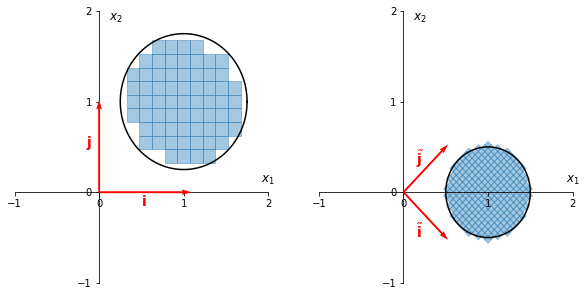

In [114]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i = [1,0]
j = [0,1]

i_T = [0.5,-0.5]
j_T = [0.5,0.5]

def plot_circle_contour(ax, radius=1, center=(0, 0), num_points=100, color='k'):
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    ax.plot(x, y, color=color)

def plot_squares_inside_circle(ax, M, radius=1, center=(0, 0), square_size=0.1, color='k'):
    num_squares = int(radius * 2 / square_size)
    offset = square_size / 2
    
    for i in range(num_squares):
        for j in range(num_squares - 1):
            x1 = center[0] - radius + i * square_size + offset
            x2 = center[0] - radius + (i + 1) * square_size + offset
            y1 = center[1] - radius + j * square_size + offset
            y2 = center[1] - radius + (j + 1) * square_size + offset
            if (x1 - center[0])**2 + (y1 - center[1])**2 <= radius**2 and \
               (x2 - center[0])**2 + (y2 - center[1])**2 <= radius**2:
                vertices = np.dot(np.array([[x1, y1], [x2,y1], [x2, y2],[x1,y2]]),M)
                ax.fill(vertices[:,0],vertices[:,1],alpha=0.4,color='C0')

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,2],[-1,2],grid=False)
    if c == 0:
        ax[c].scatter([0,j[0]],[0,j[1]],color='w')
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].text(-0.15,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.5,-0.15,'$\mathbf{i}$',color='r',fontsize=14)
        plot_circle_contour(ax[c],radius=0.75,center=(1,1))
        plot_squares_inside_circle(ax[c],M=np.array([[1, 0], [0, 1]]),radius=0.75,center=(1,1),square_size=0.15)
    else:
        ax[c].scatter([0,j_T[0]],[0,j_T[1]],color='w')
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].text(0.15,0.3,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(0.15,-0.5,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)  
        color = (0.5,0.5,0.5)
        plot_circle_contour(ax[c],radius=0.75/1.5,center=(1,0))
        plot_squares_inside_circle(ax[c],M=np.array([[0.5, -0.5], [0.5, 0.5]]), radius=0.75, center=(1,1),square_size=0.15/2)
        
plt.show()

### The determinant

The factor by which a linear transformation scales the area of a region in the space of vectors is known as the *determinant* of that transformation. In the first example where $\tilde{\pmb{i}} = [1,-2]$ and $\tilde{\pmb{j}} = [3,0]$, we found that the determinant of this transformation is equal to 6. To write this mathematically we would say:

\begin{equation}
\mathrm{det}\bigg(\begin{bmatrix} 1 & 3 \\ -2 & 0 \end{bmatrix}\bigg) = 6
\end{equation}

If we refer to the matrix which describes the linear transformation as $\pmb{M}$, it is also common to see the determinant written as $|\pmb{M}| = 6$.

So we have seen what it means to scale or shrink the area of a given region, but what would it mean for a determinant value of 0? The following matrix for example has a determinant of 0:

\begin{equation}
\mathrm{det}\bigg(\begin{bmatrix} -1 & 1 \\ -1 & 1 \end{bmatrix}\bigg) = 0
\end{equation}

When we plot this transformation it becomes more obvious why this is the case. We can see in the plot below that this results in $\tilde{\pmb{i}}$ and $\tilde{\pmb{j}}$ becoming linearly dependent, and hence the 2D space has been squished onto the 1D span of these unit vectors.

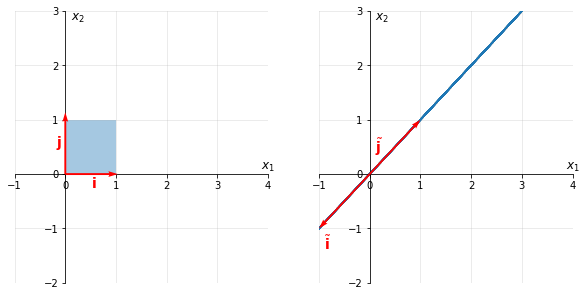

In [125]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    return np.arange(-100,100),np.arange(-100,100)*grad

i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([-1,-1])
j_T = np.array([1,1])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,4],[-2,3],xcoords=[1,0.45],ycoords=[0.25,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.85,color='r',zorder=1000)
        ax[c].text(-0.18,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.5,-0.25,'$\mathbf{i}$',color='r',fontsize=14)
        ax[c].fill_between([0,1],[1,1],alpha=0.4)
    else:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=1.0,color='r',zorder=1000)
        ax[c].text(0.1,0.4,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(-0.9,-1.4,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        tranI = transform_gridlines(i_T)
        tranJ = transform_gridlines(j_T)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T[0]*n,tranI[1]+j_T[1]*n,color='C0')
            ax[c].plot(tranJ[0]+i_T[0]*n,tranJ[1]+i_T[1]*n,color='C0')

What about negative determinants? Well, this can happen if the orientation of space is inverted. Let's look at following the example:

\begin{equation}
\mathrm{det}\bigg(\begin{bmatrix} 1 & 2 \\ 1 & -1 \end{bmatrix}\bigg) = -3
\end{equation}

Here we can see that the determinant has a value of -3. This means that a given area of 2D has been scaled by a factor of three, but also the orientation of this space has been inverted:

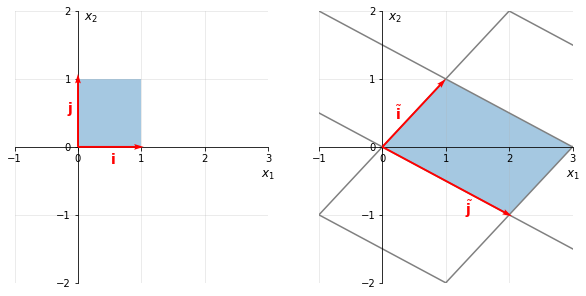

In [4]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    return np.arange(-100,100),np.arange(-100,100)*grad

i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([1,1])
j_T = np.array([2,-1])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,3],[-2,2],xcoords=[1,0.42],ycoords=[0.3,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].text(-0.18,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.5,-0.25,'$\mathbf{i}$',color='r',fontsize=14)
        ax[c].fill_between([0,1],[1,1],alpha=0.4)
    else:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=1.0,color='r',zorder=1000)
        ax[c].text(0.2,0.4,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        ax[c].text(1.3,-1,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        tranI = transform_gridlines(i_T)
        tranJ = transform_gridlines(j_T)
        vertices = np.dot(np.array([[0, 1], [1,1], [1, 0],[0,0]]),np.array([[1, 1], [2, -1]]))
        ax[c].fill(vertices[:,0],vertices[:,1],alpha=0.4)  
        
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T[0]*n,tranI[1]+j_T[1]*n,color=(0.5,0.5,0.5))
            ax[c].plot(tranJ[0]+i_T[0]*n,tranJ[1]+i_T[1]*n,color=(0.5,0.5,0.5))

Notice here how in the untransformed space, $\pmb{j}$ is to the left of $\pmb{i}$. After the linear transformation $\tilde{\pmb{j}}$ is to the right of $\tilde{\pmb{i}}$. If you think of a piece of paper as representing the 2D space shown in these plots, then this transformation corresponds to flipping that piece of paper.

Note that there is a general expression for computing the determinant of a 2D matrix. This is given as:

\begin{equation}
\mathrm{det}\bigg(\begin{bmatrix} a & b \\ c & d \end{bmatrix}\bigg) = ad - bc
\end{equation}

and for a 3D matrix:

\begin{equation}
\mathrm{det}\Bigg(\begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}\Bigg) = a \cdot \mathrm{det}\bigg(\begin{bmatrix} e & f \\ h & i \end{bmatrix}\bigg) - b \cdot \mathrm{det}\bigg(\begin{bmatrix} d & f \\ g & i \end{bmatrix}\bigg) + c \cdot \mathrm{det}\bigg(\begin{bmatrix} d & e \\ g & h \end{bmatrix}\bigg)
\end{equation}

I don't think it's particularly useful to memorise this computation, but it's useful to realise what the determinant means physically. We have shown examples here of computing the determinant for 2D problems, however the 3D problem is conceptually similar. It just means we are computing volume changes rather than area. 

Note that to quickly compute the determinant of any size square matrix, you can just use the function *numpy.linalg.det()*

### Upcoming...

Now that we have a better feel for matrices, the next notebook will introduce the some important matrix operations, such as matrix inverses